In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.modules.oracle import Oracle
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = True

In [3]:
WINDOW = 3600 # 1 hrs # NOTE this is way longer than the actual contract
PERIOD = 86400 # 1 day

def gen_gbm(S0,mu,sigma, dt, T):
    W = np.random.normal(loc=0, scale=np.sqrt(dt), size=int(T / dt))
    S = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * W))
    return(S)

In [4]:
# Test oracle with price updates every minute
oracle = Oracle(WINDOW)

start = int(datetime.now().timestamp())
times = [int(start + dt*60) for dt in range(0, PERIOD//60)]

df = pd.DataFrame()
df['timestamp'] = times
df['spot'] = gen_gbm(S0=1800,mu=0.05, sigma=0.2, dt=1/1440,T=1)
df['oracle'] = df.apply(lambda row: oracle.update(row['timestamp'], row['spot']), axis=1)
df.index = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,timestamp,spot,oracle
timestamp,,,
2023-10-20 22:28:46,1697840926,1811.162097,1811.162097
2023-10-20 22:29:46,1697840986,1809.354555,1811.132221
2023-10-20 22:30:46,1697841046,1807.627943,1811.074300
2023-10-20 22:31:46,1697841106,1812.226342,1811.093342
2023-10-20 22:32:46,1697841166,1797.182970,1810.863423


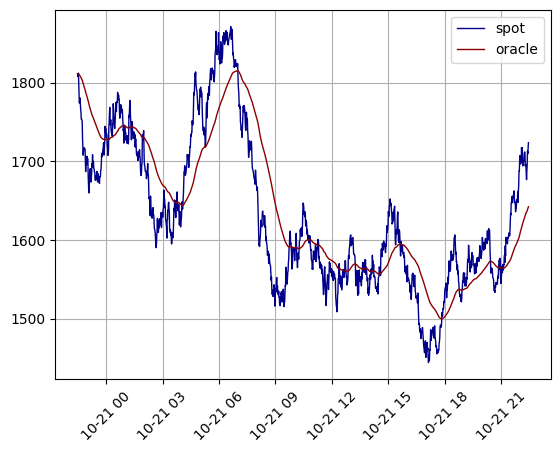

In [5]:
f, ax = plt.subplots()

ax.plot(df.index, df['spot'], label='spot', c='darkblue', lw=1)
ax.plot(df.index, df['oracle'], label='oracle', c='darkred', lw=1)
ax.legend()
ax.tick_params(axis='x', rotation=45)